# Loading Library


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#  Loading Datasets

In [2]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

# Display Top 5 rows


In [3]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Count the numbers of rows and columns

In [4]:
titanic_train.shape

(891, 12)

# Some additional Stats

In [5]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

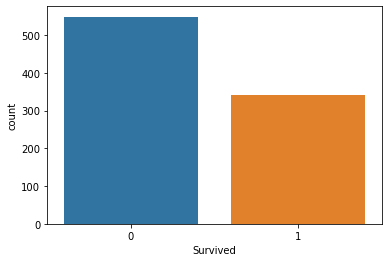

In [7]:
sns.countplot(titanic_train['Survived'])

In [8]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

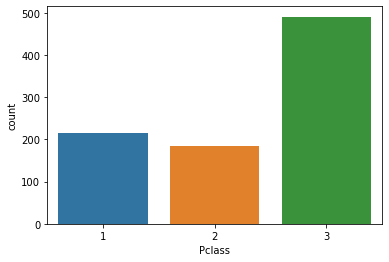

In [9]:
sns.countplot(titanic_train['Pclass'])

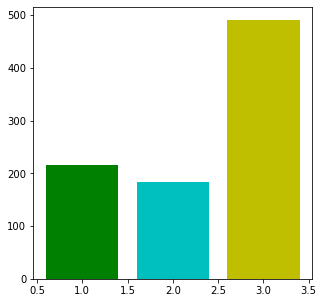

In [10]:
plt.figure(figsize=(5,5))
plt.bar(titanic_train['Pclass'].value_counts().keys(),titanic_train['Pclass'].value_counts(), color= ['y','g','c'])
plt.show()

In [11]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

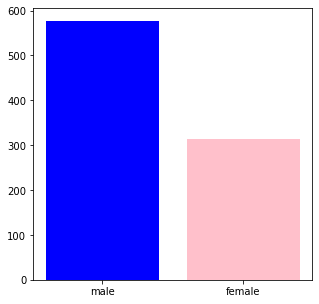

In [12]:
plt.figure(figsize=(5,5))
plt.bar(titanic_train['Sex'].value_counts().keys(),titanic_train['Sex'].value_counts(), color= ['Blue','Pink'])
plt.show()

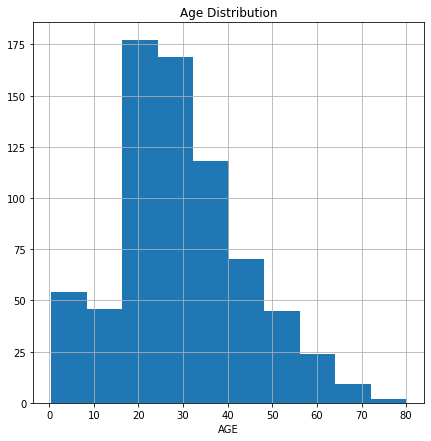

In [13]:
plt.figure(figsize= (7,7))
plt.hist(titanic_train['Age'])
plt.title('Age Distribution')
plt.xlabel('AGE')
plt.grid()
plt.show()

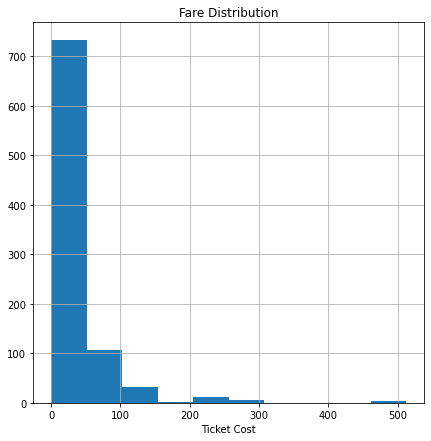

In [14]:
plt.figure(figsize= (7,7))
plt.hist(titanic_train['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Ticket Cost')
plt.grid()
plt.show()

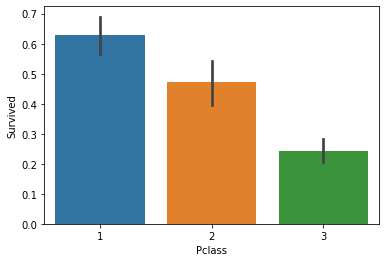

In [15]:
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_train)

# Visualize count of survivors for columns	Pclass	Sex	Age	SibSp	Parch	Cabin Embarked

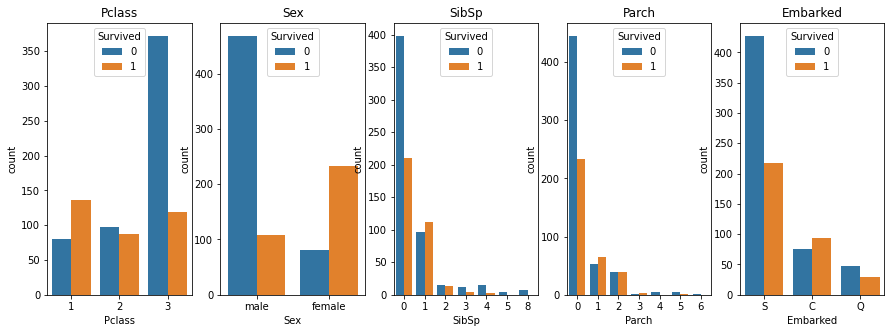

In [16]:
cols = ['Pclass', 'Sex','SibSp','Parch','Embarked']
n_rows = 1
n_cols = 5
#subplot grid

fig, axs = plt.subplots(n_rows, n_cols, figsize = (15,5))

for r  in range (0,n_rows):
    for c in range (0, n_cols):
        i = r*n_cols + c  #index to go through the column
        ax = axs[c]     #show where to position each subplots
        sns.countplot(titanic_train[cols[i]], hue = titanic_train['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title ='Survived', loc = 'upper center')
plt.show()

In [17]:
titanic_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
#Chances of survival w.r.t Pclass
titanic_train.pivot_table('Survived', index = 'Sex', columns= 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


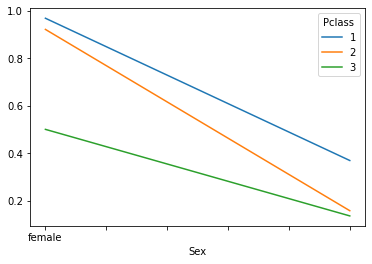

In [19]:
#Chances of survival w.r.t Pclass visually
titanic_train.pivot_table('Survived', index = 'Sex', columns= 'Pclass').plot()

In [20]:
#look at survival rate w.r.t sex, age , class
age = pd.cut(titanic_train['Age'], (0,18,80))
titanic_train.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

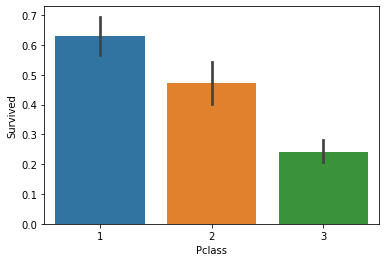

In [21]:
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_train)

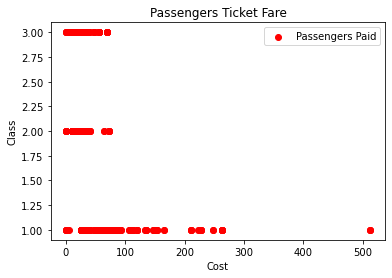

In [22]:
#plotting fare w.r.t class
plt.scatter(titanic_train['Fare'],titanic_train['Pclass'], color = 'red', label= 'Passengers Paid')
plt.xlabel('Cost')
plt.ylabel('Class')
plt.legend()
plt.title('Passengers Ticket Fare')
plt.show()

In [23]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#look at each column and get a count
for val in titanic_train:
    print(titanic_train[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Laroche, Mr. Joseph Philippe Lemercier         1
Stahelin-Maeglin, Dr. Max                      1
Lines, Miss. Mary Conover                      1
Ford, Mrs. Edward (Margaret Ann Watson)        1
Boulos, Mrs. Joseph (Sultana)                  1
                                              ..
Jensen, Mr. Svend Lauritz                      1
Hunt, Mr. George Henry                         1
Barton, Mr. David John                         1
Davidson, Mr. Thornton                         1
Hart, Mrs. Benjamin (Esther Ada Bloomfield)    1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0

In [25]:
#Drop the column with more none value 
titanic_train = titanic_train.drop(['Cabin','Name', 'PassengerId', 'Ticket'], axis = 1)

In [26]:
titanic_train = titanic_train.dropna(subset=['Age', 'Embarked'])

In [27]:
titanic_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
titanic_train.shape

(712, 8)

In [29]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [30]:
titanic_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
663,0,3,male,36.0,0,0,7.4958,S
801,1,2,female,31.0,1,1,26.2500,S
125,1,3,male,12.0,1,0,11.2417,C
880,1,2,female,25.0,0,1,26.0000,S
562,0,2,male,28.0,0,0,13.5000,S


In [31]:
titanic_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

In [32]:
#pd.get_dummies(titanic_train, drop_first=True)

In [33]:
titanic_train["Fare"] = titanic_train['Fare'].apply(np.ceil)
titanic_train["Fare"] = titanic_train.Fare.astype(int)
titanic_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
193,1,2,male,3.0,1,1,26,S
447,1,1,male,34.0,0,0,27,S
664,1,3,male,20.0,1,0,8,S
183,1,2,male,1.0,2,1,39,S
44,1,3,female,19.0,0,0,8,Q


In [34]:
titanic_train["Age"] = titanic_train["Age"].astype(int)
titanic_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
544,0,1,male,50,1,0,107,C
512,1,1,male,36,0,0,27,S
817,0,2,male,31,1,1,38,C
541,0,3,female,9,4,2,32,S
122,0,2,male,32,1,0,31,C


In [35]:
X = titanic_train.drop(['Survived'], axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,8,S
1,1,female,38,1,0,72,C
2,3,female,26,0,0,8,S
3,1,female,35,1,0,54,S
4,3,male,35,0,0,9,S
...,...,...,...,...,...,...,...
885,3,female,39,0,5,30,Q
886,2,male,27,0,0,13,S
887,1,female,19,0,0,30,S
889,1,male,26,0,0,30,C


In [36]:
y = titanic_train.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [37]:
X = pd.get_dummies(X, drop_first=True)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [40]:
X = sc.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [42]:
len(X_train)

569

In [43]:
len(X_test)

143

In [44]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

LogisticRegression()

In [45]:
lrc.score(X_test, y_test)

0.7972027972027972

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
rfc.score(X_test, y_test)

0.7622377622377622

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([0.78070175, 0.80701754, 0.80701754, 0.79824561, 0.84070796])

In [50]:
cross_val_score(RandomForestClassifier(n_estimators=40), X_train, y_train)

array([0.78070175, 0.78070175, 0.78947368, 0.80701754, 0.84955752])